<a href="https://colab.research.google.com/github/jhguay/base_ouverte/blob/main/MataneLabo1_avecComparaisonRegressionv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparaison entre les prédictions de la régression linéaire classique et l'IA (réseaux de neurones), deux variables continues**


Ici je reprends l'exemple et une partie du code développé dans le cours **Vision artificielle et exploitation des ressources naturelles** du Cegep de Matane. La base donne cinq informations: le **nom commun**, le **nom scientifique**, la **masse** en kg, le **métabolisme** en joules et la** durée de vie** en année.  C'est la loi de Kleiber, expliquant le métabolisme par la masse, qui constitue le fondement théorique de cette base.

Plusieurs étapes: 

1.   On importe les bibliothèques nécessaires; on importe la base et on 
regarde les données sommairement.
2.   On fait la régression classique de laquelle on extrait le coefficient et la constante.
3.   On prépare le réseau de neurones et on l'applique
4.   On compare l'erreur d'estimation des deux méthodes





# Étape 1: Importation des bibliothèques et de la base de données

In [16]:
# Importation des bibliothèques Python
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import random
import math
from sklearn.preprocessing import StandardScaler

# Lecture des données
loi_kleiber_data = pd.read_csv("https://github.com/ClaudeCoulombe/VIARENA/blob/master/DATA/LoiDeKleiber.csv?raw=True")
print(loi_kleiber_data)
print("Données lues")

# Information sur la base
loi_kleiber_data.info()
loi_kleiber_data.sample(n=5,random_state=42)
loi_kleiber_data['Masse'].max()


                 NomCommun                    Espece    Masse  Metabolisme  \
0                  Echidna    Tachiglossus aculeatus    2.500        302.0   
1      Long-beaked echidna         Zaglossus bruijni   10.300        594.0   
2                 Platypus  Ornithorhynchus anatinus    1.300        229.0   
3                  Opossum  Lutreolina crassicaudata    0.812        196.0   
4   South American opossum     Didelphis marsupialis    1.330        299.0   
..                     ...                       ...      ...          ...   
90           Rhesus monkey            Macaca mulatta    5.000        960.0   
91               Orangutan           Pongo pygma eus  150.000      15500.0   
92                 Gorilla           Gorilla gorilla  250.000      21000.0   
93                  Gibbon             Hylobater lar    8.000       1510.0   
94                   # Man              Homo sapiens   65.000       7560.0   

    DureeDeVie  
0         14.0  
1         20.0  
2          9

3000.0

# Étape 2: Traitement selon la méthode classique de la régression

In [3]:
import statsmodels.api as sm
from patsy import dmatrices
y,x=dmatrices('Metabolisme ~ Masse', data=loi_kleiber_data,return_type='dataframe')
mod=sm.OLS(y,x)
res=mod.fit()
print(res.summary())

#Application de l'équation de régresion
print("--------------------------------------------------------------------------------------------------------------")
masse=65
predictionMetabolisme=1203.2019+(57.0268*masse)
print(predictionMetabolisme)

                            OLS Regression Results                            
Dep. Variable:            Metabolisme   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4302.
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           1.15e-79
Time:                        14:33:22   Log-Likelihood:                -887.05
No. Observations:                  95   AIC:                             1778.
Df Residuals:                      93   BIC:                             1783.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1203.2019    291.270      4.131      0.0

#Étape 3: Traitement selon la méthode propre à l'intelligence artificielle

In [ ]:
# Définir un germe aléatoire
GERME_ALEATOIRE=11
os.environ['PYTHONHASHSEED'] = str(GERME_ALEATOIRE)
random.seed(GERME_ALEATOIRE)
np.random.seed(GERME_ALEATOIRE)
tf.random.set_seed(GERME_ALEATOIRE)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
print("Germe aléatoire fixé")

#On isole les deux variables et on les normalise

attribut_predictif = loi_kleiber_data['Masse'].values.reshape(-1, 1)
normalisateur_attribut_predictif = StandardScaler()
normalisateur_attribut_predictif.fit(attribut_predictif)
attribut_predictif = normalisateur_attribut_predictif.transform(attribut_predictif)

attribut_cible = loi_kleiber_data['Metabolisme'].values.reshape(-1, 1)
normalisateur_attribut_cible = StandardScaler()
normalisateur_attribut_cible.fit(attribut_cible)
attribut_cible = normalisateur_attribut_cible.transform(attribut_cible)

# Construction d'un réseau de neurones de typ percptron à trois couches: couche d'entrée, couche cachée, couche de sortie
reseau_de_neurones = tf.keras.models.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1]),
                                                 tf.keras.layers.Dense(units=10, activation='relu'),
                                                 tf.keras.layers.Dense(units=1)])
# Affichage de l'architecture du réseau
print("Architecture du réseau de neurones:")
reseau_de_neurones.summary()

#Compilation du réseau de neurones
# optimiseur: Adam
# taux d'apprentissage: 0.001
# fonction d'erreur: erreur quadratique moyenne ('mean_squared_error') 

# Compilation du réseau de neurones - optimiseur: Adam, taux d'apprentissage: 0.001, fonction d'erreur: erreur quadratique moyenne (mean_squared_error) 
reseau_de_neurones.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')
print("Réseau de neurones compilé")

# Entraînement du réseau sur les données: variable_explicative et variable_dependante, pendant 500 itérations ou époques
traces = reseau_de_neurones.fit(attribut_predictif,attribut_cible,epochs=500,verbose=1)
# Affichage de l'erreur à la fin de l'entraînement
print("Erreur à la fin:",traces.history['loss'][-1])


In [5]:
#Examen ponctuel pour vérifier l'exactitude du réseau de neurones

# Être humain, Homo sapiens
animal = "être humain"
masse = 6.50E+01
# Normalisation de la donnée d'entrée
masse_normalisee = normalisateur_attribut_predictif.transform(np.array([masse]).reshape(-1, 1))
vraie_valeur_metabolisme = 7.56E+03
# Application du modèle en inférence ou prédiction de la variable dépendante et «dénormalisation» du résultat
prediction_metabolisme = normalisateur_attribut_cible.inverse_transform(reseau_de_neurones.predict(masse_normalisee))[0][0]
# Affichage de la prédiction, de la vraie valeur (mesurée) et de l'écart (ou erreur) en %
print("\nAnimal:", animal,
      ", Masse:", masse,
      ", prédiction du métabolisme:", round(prediction_metabolisme,2),
      ", Vraie valeur du métabolisme:", vraie_valeur_metabolisme,
      ", écart en %:", round((vraie_valeur_metabolisme-prediction_metabolisme)/vraie_valeur_metabolisme*100,2),"%")

1/1 [==============================] - 0s 323ms/step

Animal: être humain , Masse: 65.0 , prédiction du métabolisme: 8268.58 , Vraie valeur du métabolisme: 7560.0 , écart en %: -9.37 %


# Étape 4 Comparaison des deux méthodes

In [ ]:
#Création de deux petites fonctions pour générer les prédictions de deux méthodes
def obtientPredictionDuRN(masse=65):
  masse_normalisee = normalisateur_attribut_predictif.transform(np.array([masse]).reshape(-1, 1))
  prediction_metabolisme = normalisateur_attribut_cible.inverse_transform(reseau_de_neurones.predict(masse_normalisee))[0][0]
  return round(prediction_metabolisme,1)

def obtientPredictionDuR(masse=65):
  predictionRegressionMetabolisme=1203.2019+(57.0268*masse)
  return round(predictionRegressionMetabolisme,1)

#Création des deux listes
listeResultatsRN=[] #liste des résultats selon le modèle du réseau de neurones
for i in range(2,3000,20):
  listeResultatsRN.append(obtientPredictionDuRN(i))

listeResultatsR=[] #liste des résultats selon le modèle de la régression classique
for i in range(2,3000,20):
  listeResultatsR.append(1203.2019+(57.0268*i))



In [ ]:
def calculErreur(valeurReelle=2,estimation=1):
  resultat=(valeurReelle-estimation)/valeurReelle*100

  return round(resultat,1)

listeDesMasses=list(loi_kleiber_data["Masse"])


print(listeDesMasses)
for i in range(0, len(listeDesMasses)):
  print("Nom "+str(loi_kleiber_data['NomCommun'][i])+
      " Masse: "+str(loi_kleiber_data['Masse'][i])+
        " Metabolisme: "+str(loi_kleiber_data['Metabolisme'][i])+
        " R: "+str(obtientPredictionDuR(loi_kleiber_data['Masse'][i]))+
        " RN: "+str(obtientPredictionDuRN(loi_kleiber_data['Masse'][i]))+
        " Erreur R (%): "+str(calculErreur(loi_kleiber_data['Metabolisme'][i],obtientPredictionDuR(loi_kleiber_data['Masse'][i])))+
        " Erreur RN (%):"+str(calculErreur(loi_kleiber_data['Metabolisme'][i],obtientPredictionDuRN(loi_kleiber_data['Masse'][i]))))


In [83]:
#Création d'une base avec l'ensemble des données
listeColonnes=['Nom', 'Masse', 'Metabolisme', 'Regression','ReseauN', 'ErreurR', 'ErreurRN']
dfinal = pd.DataFrame(columns=listeColonnes)
for i in range(0,len(loi_kleiber_data['NomCommun'])):
    df2 = pd.DataFrame([[str(loi_kleiber_data['NomCommun'][i]),
                         str(loi_kleiber_data['Masse'][i]),
                         str(loi_kleiber_data['Metabolisme'][i]),
                         str(obtientPredictionDuR(loi_kleiber_data['Masse'][i])),
                         str(obtientPredictionDuRN(loi_kleiber_data['Masse'][i])),
                         str(calculErreur(loi_kleiber_data['Metabolisme'][i],obtientPredictionDuR(loi_kleiber_data['Masse'][i]))),
                         str(calculErreur(loi_kleiber_data['Metabolisme'][i],obtientPredictionDuRN(loi_kleiber_data['Masse'][i])))]], columns=listeColonnes)
                             
    dfinal=dfinal.append(df2)                 




1/1 [==============================] - 0s 38ms/step


------------------------------
                      Nom    Masse Metabolisme Regression   ReseauN   ErreurR ErreurRN  Comparaison  Evaluation
0                 Echidna      2.5       302.0     1345.8     479.1    -345.6    -58.6     5.897611           1
0     Long-beaked echidna     10.3       594.0     1790.6    1458.4    -201.4   -145.5     1.384192           1
0                Platypus      1.3       229.0     1277.3     328.5    -457.8    -43.4    10.548387           1
0                 Opossum    0.812       196.0     1249.5     267.2    -537.5    -36.3    14.807163           1
0  South American opossum     1.33       299.0     1279.0     332.2    -327.8    -11.1    29.531532           1
0        Virginia opossum     3.26       519.0     1389.1     574.5    -167.6    -10.7    15.663551           1
0    Australian marsupial   0.0141         9.0     1204.0     167.0  -13277.8  -1755.6     7.563112           1
0             Marsupial    0.00365        17.6     1203.4     165.7   -67

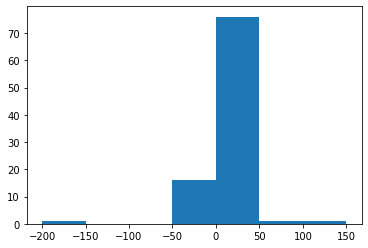

In [110]:
#print(dfinal)
dfinal['Comparaison']=dfinal['ErreurR'].astype(float)/dfinal['ErreurRN'].astype(float)
#print(dfinal)

dfinalx=pd.DataFrame(dfinal)

#print(loi_kleiber_data['Metabolisme'][1])
#print(dfinal['Comparaison'].values[1])

print("------------------------------")

#dfinal['Evaluation']=0

for i in range(0,len(loi_kleiber_data)):
  #print(i)
  if(abs(dfinal['Comparaison'].values[i])>1):
    dfinal['Evaluation'].values[i]=1
  else:  
    dfinal['Evaluation'].values[i]=0


print(dfinal.to_string())
print(dfinal['Evaluation'].sum())


#math.sqrt(((dfinal['ErreurR'].astype(float))*(dfinal['ErreurR'].astype(float))).sum()/len(dfinal))
#abs(dfinal['ErreurR'].astype(float)).mean()

#
plt.hist(dfinal['Comparaison'].values, bins=range(-200,200,50))


plt.show()

In [96]:
if(dfinal['Comparaison'].values[16]>1):
  print("plus grand")
else:
  print("plus petit")


plus grand


In [94]:
print(dfinal.to_string())

                      Nom    Masse Metabolisme Regression   ReseauN   ErreurR ErreurRN  Comparaison         Evaluation
0                 Echidna      2.5       302.0     1345.8     479.1    -345.6    -58.6     5.897611  RN performe mieux
0     Long-beaked echidna     10.3       594.0     1790.6    1458.4    -201.4   -145.5     1.384192  RN performe mieux
0                Platypus      1.3       229.0     1277.3     328.5    -457.8    -43.4    10.548387  RN performe mieux
0                 Opossum    0.812       196.0     1249.5     267.2    -537.5    -36.3    14.807163  RN performe mieux
0  South American opossum     1.33       299.0     1279.0     332.2    -327.8    -11.1    29.531532  RN performe mieux
0        Virginia opossum     3.26       519.0     1389.1     574.5    -167.6    -10.7    15.663551  RN performe mieux
0    Australian marsupial   0.0141         9.0     1204.0     167.0  -13277.8  -1755.6     7.563112  RN performe mieux
0             Marsupial    0.00365        17.6  

[416.3, 2927.2, 5438.1, 7948.5, 10082.4, 12042.1, 13852.3, 15662.6, 17472.8, 18817.5, 19866.9, 20916.4, 21965.8, 23015.3, 24064.7, 25114.2, 26163.6, 27213.1, 28262.6, 29312.0, 30361.4, 31410.9, 32460.4, 33509.8, 34559.3, 35608.7, 36658.2, 37707.6, 38757.1, 39806.5, 40856.0, 41905.4, 42954.9, 44004.3, 45053.8, 46103.2, 47152.7, 48202.2, 49251.6, 50301.0, 51350.5, 52400.0, 53449.4, 54498.9, 55548.3, 56597.8, 57647.2, 58696.7, 59746.1, 60795.6, 61845.0, 62894.5, 63943.9, 64993.4, 66042.8, 67092.3, 68141.8, 69191.2, 70240.6, 71290.1, 72339.6, 73389.0, 74438.5, 75487.9, 76537.4, 77586.8, 78636.3, 79685.7, 80735.2, 81784.6, 82834.1, 83883.5, 84933.0, 85982.4, 87031.9, 88081.4, 89130.8, 90180.3, 91229.7, 92279.2, 93328.6, 94378.1, 95427.5, 96477.0, 97526.4, 98575.9, 99625.3, 100674.8, 101724.2, 102773.7, 103823.2, 104872.6, 105922.0, 106971.5, 108021.0, 109070.4, 110119.9, 111169.3, 112218.8, 113268.2, 114317.7, 115367.1, 116416.6, 117466.0, 118515.5, 119564.9, 120614.4, 121663.8, 122713.3, 1

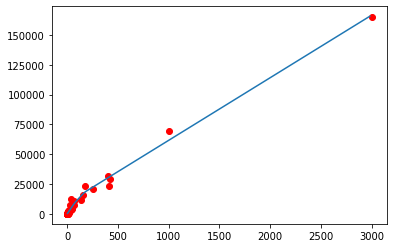

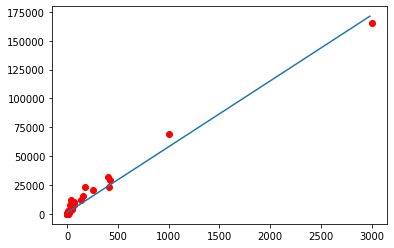

In [10]:
print(listeResultatsRN)

import matplotlib.pyplot as plt
import numpy as np


plt.plot(range(2,3000,20),listeResultatsRN)
plt.scatter(loi_kleiber_data['Masse'], loi_kleiber_data['Metabolisme'], color='red')
plt.show()

plt.plot(range(2,3000,20),listeResultatsR)
plt.scatter(loi_kleiber_data['Masse'], loi_kleiber_data['Metabolisme'], color='red')
plt.show()




